# Sarah Higgins
## Data Science Final Project


# *Do Protected Bike Lanes Reduce Accidents Involving Cyclists?*

Notebook Sequence:
* Overview
    * DataSets Employed
    * Visualization Role
* Methods and Tools:
    * MatPlotLib Inline
    * Image library
    * MatPlotLib plt library
    * Numpy library
    * Pandas library
    * re library
    * datetime library
* Problem Specification
    * Research Question
* Selection of Data:
    * Boston Streets With Protected/ Buffered Bike Lanes
    * Boston Streets Without Buffered Bike Lanes
    * Peak Traffic Times for Streets With Protected Bike Lanes
    * Average Number of Cyclists and Motorists on Sample Set Streets
    * Recorded Crashes on Streets With Buffered Bike Lanes
    * Recorded Crashes on Streets Without Buffered Bike Lanes
    * Comparisons
* Visualization
    * Findings from Data Selection
    * Determine if Protected Bike Lanes are Safer For Cyclists
* Survey of Methods and Tools:
   


## Overview

This project analyzes the data collected for all bycicle collision accidents that take place in the city of Boston, Massachusetts.  This will be compared to the streets most frequently taken by cyclists, and whether or not there are already protected bike lanes on those streets.  If there is not a protected bike lane on a frequently taken street and there is also a higher amount of bicycle accidents that take place, adding a protected bike lane will help lower the number of accidents involving a cyclist that happen.  

## Methods and Tools

In [463]:
%matplotlib inline
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
import re, datetime

For this project, there are some required tools that we will be working with: 

**%matplotlib inline** 

Matplotlib is a magic function in Python.  Matplotlib itself is a plotting library that allows us to create 2D visuals from the datasets.  Inline allows what is happening on matplotlib's backend to be seen on the frontend as a 2D plotting visual for us, the user.  Because this is a Jupyter Notebook environment, the inline will allow us to see the visuals.

**from IPython.display import Image**
Image is an IPython library that allows us to call the Image function to import a specific image that is saved within the scope of the notebook space.  The images chosen for this project help to better see and describe the differences between Buffered Bike Lanes from Bike Lanes.

**import matplotlib.pyplot as plt**

From the pyplot library, the variable assignment *plt* allows us to make direct changes to the plot we will be creating. 

**from matplotlib.pyplot import figure**

From means we are imporing figure from matplotlib's pyplot library.  Figure will allow us to later on in our 2D representation make custom changes to it such as size, color, and font size.  The best way to see the data we are working with for this project is in a graph, and matplotlib's pyplot allows us to do that. 

**plt.style.use('seaborn-whitegrid)**

Seaborn-whitegrid gives a nicer, cleaner looking graph than Matplotlib does on its own.  Seaborn's whitegrid gives us prettier representations of the data that would otherwise be created with Matplotlib on its own.

**import numpy as np**

NumPy is a Python library.  It adds a lot of support for the user to work with larger datasets and multi-dimensional arrays or matrices in a much shorter amount of time.  It supports a lot of high-level mathematical functions to work on these arrays and matrices as well.

**import pandas as pd**

Pandas is a Python library.  It is used for data analysis and manipulation.  Pandas allows us to rename columns and/or entries within the imported datasets, which we will be doing in this project to make merging the datasets go smoothly.

**import re, datetime**

*re* - This is a regex library within Python.  There will be a large amount of data manipulation later on in this project to rename St, Ave, Rd abbreviations to their full, capitalized names such as STREET, AVENUE, and ROAD.  Importing and using regex allows us to do this accurately so that only the abbreviation is taken care of, instead of for example the ST within BOYLSTON ST being changed to BOYLSTREEON STREET, which is not correct.

*datetime* - This is a date and time library within Python.  To create the 2D visual later on in this project, we will need to extract the year from the time of dispatch within the crash dataset.  Doing so will allow easy creation of a 2D visual with the years displayed on the x axis rather than the entire timestamp itself.

### *Datasets Employed*

The data sets we will be working with are:


* *Existing_Bike_Network.csv* : dataset with the existing bicycle network in Boston

* *Bike_facility_Descriptions*: how to read each of the abbreviations of the Existing Bike Network bike path type

* *cyclists_data.csv* : dataset with crash and collision statistics, last updated December, 2018

* *most_frequently_taken.csv* : dataset created from data on [Boston Bicycle Counts](https://www.boston.gov/departments/boston-bikes/bike-data/2017-boston-bicycle-counts), it shows which streets have more than 10% of its total vehicles are cyclists

In [455]:
# Dataset Uploads: 
descriptions = pd.read_csv("Bike_Facility_Descriptions.csv")
accidents = pd.read_csv("cyclist_accidents.csv")
bike_network = pd.read_csv("Existing_Bike_Network.csv")
most_cycled = pd.read_csv("Most_frequently_taken.csv")

# descriptions
# accidents
# bike_network
# most_cycled

,Code,Facility Type,Facility Description,Network Status,Example
0,NaN,NaN,NaN,NaN,NaN
1,ADV,Advisory Lane,"On low-volume, narrow roads (< 30' without par...",Pilot Facility,NaN
2,BFBL,Buffered Bike Lane,"A 5' min. exclusive lane for bicycle travel, w...",Existing Facility,"Seaport Blvd, South Boston"
3,PBFBL,"Buffered Bike Lane, parking side","A 5' min. exclusive lane for bicycle travel, w...",NaN,NaN
4,BL,Bike Lane,A 5' min. exclusive lane for bicycle travel,Existing Facility,"Mass Ave, Back Bay"
5,BSBL,Bus Bike Lane,An 11' min. lane for shared bus and bicycle tr...,Existing Facility,"Washington St, South End"
6,CFBL,Contraflow Bike Lane,"On one-way streets, bicyclists may operate in ...",Pilot Facility,NaN
7,CL,Climbing Lane,On roads with steep grades where bicycle lanes...,Existing Facility,"Centre St, JP"
8,CT,Cycle Track,A physically separated bicycle facility protec...,Existing Facility,"Western Ave, Allston"
9,NW,Neighborway,"Also known as bicycle boulevards, neighborways...",Pilot Facility,NaN


### *Data Set Dictionary: *

*Boston_Bicycle_Network_Data_Dictionary* : [Dictionary](https://github.com/saramberr12/Boston-Cycle-Track-Safety/blob/master/ExistingBikeNetworkDataDictionary.pdf)

The descriptions dataset shows what the Existing Facility type is within the `bike_network` database:

In [288]:
descriptions = descriptions.rename(columns={'Facility Type': 'Type', 'Facility Description':'Description', 
                                            'Network Status':'Status'})
descriptions

,Code,Type,Description,Status,Example
0,NaN,NaN,NaN,NaN,NaN
1,ADV,Advisory Lane,"On low-volume, narrow roads (< 30' without par...",Pilot Facility,NaN
2,BFBL,Buffered Bike Lane,"A 5' min. exclusive lane for bicycle travel, w...",Existing Facility,"Seaport Blvd, South Boston"
3,PBFBL,"Buffered Bike Lane, parking side","A 5' min. exclusive lane for bicycle travel, w...",NaN,NaN
4,BL,Bike Lane,A 5' min. exclusive lane for bicycle travel,Existing Facility,"Mass Ave, Back Bay"
5,BSBL,Bus Bike Lane,An 11' min. lane for shared bus and bicycle tr...,Existing Facility,"Washington St, South End"
6,CFBL,Contraflow Bike Lane,"On one-way streets, bicyclists may operate in ...",Pilot Facility,NaN
7,CL,Climbing Lane,On roads with steep grades where bicycle lanes...,Existing Facility,"Centre St, JP"
8,CT,Cycle Track,A physically separated bicycle facility protec...,Existing Facility,"Western Ave, Allston"
9,NW,Neighborway,"Also known as bicycle boulevards, neighborways...",Pilot Facility,NaN


As we can see from the descriptions, the Code BFBL means Buffered Bike Lane.  This is the safest on-street cycling option at the moment in Boston, excluding Shared-Use Paths (SUP).

## Problem Specification


**Research Question**
    Given the number of accidents per these streets that attract more cyclists throughout the day and at peak times, does adding a protected bike lane to the street help lower the number of accidents involving cyclists that take place there?
    
    
Prediction:  Yes.  Adding Buffered Bike Lanes will result in a safer city for all commuters who are motorists and cyclists.  This will also increase the likelyhood of Boston becoming a greener city with less carbon emissions due to more frequent cyclists taking these streets. 


## Selection of Data

###  *All Streets With Buffered Bike Lanes*

First, we'll get street names that have protected bike lanes already.  For this project, Protected Bike Lanes are described as Buffered Bike Lanes.  This category provides more of a painted barrier between the cyclist and the road than a bike lane on its own and sometimes have pylons to add more separation from motorists.

This is an example of a buffered bike lane: 

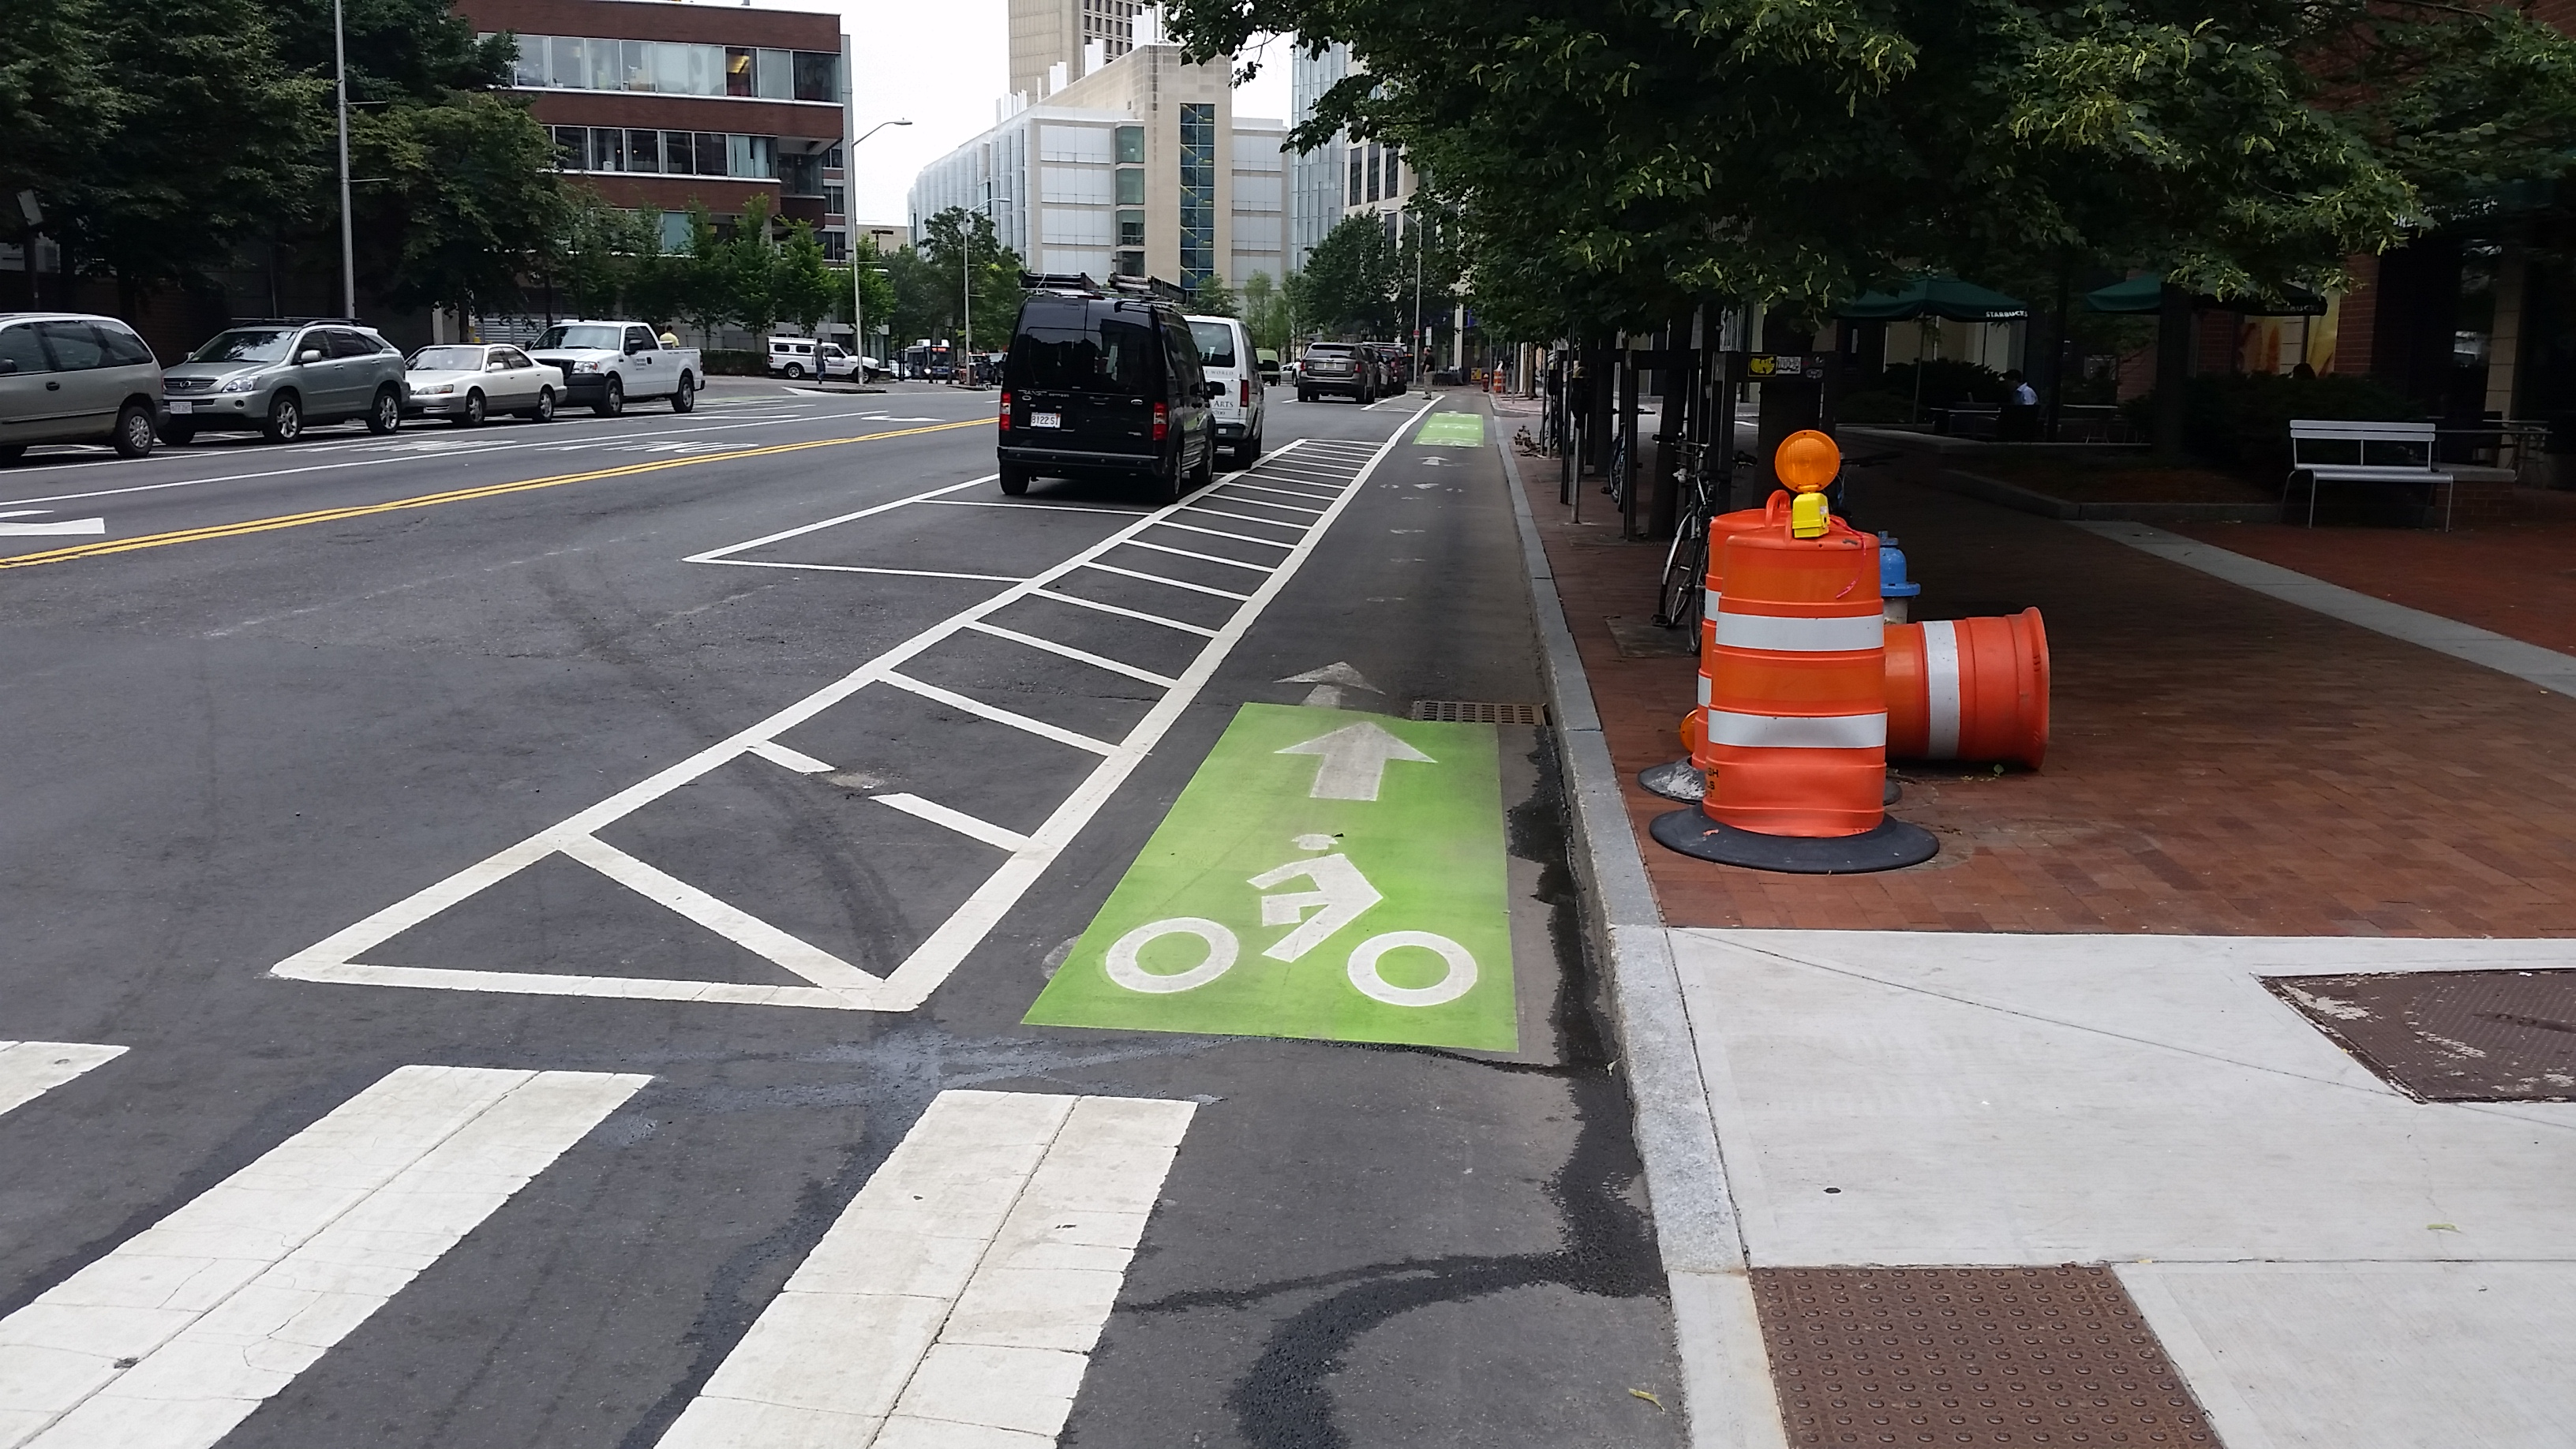

In [445]:
# Don't run this cell in MyBinder, it will throw an error:

Image('/home/higginss1/FinalProjectSarahHiggins/buffered_bike_lane.jpg')

In [291]:
bfbl_df = bike_network.loc[bike_network['ExisFacil'] == 'BFBL']
drop_id = bfbl_df.drop(['OBJECTID'], axis=1)
final_bfbl = drop_id.drop_duplicates(['STREET_NAM'])
final_bfbl_df = final_bfbl.rename(index=str, columns={"STREET_NAM": "STREET"})
final_bfbl_df['STREET'] = final_bfbl_df['STREET'].str.upper() 
# final_bfbl_df

#### Buffered Bike Lane Data Cleaned Up:

We're only concerned about the street names.  Let's create dataframes only containing the street name and bike facility type so that we can later merge them onto the crash dataset.

In [292]:
# Cleaned Buffered Bike Lane Data:

clean_bfbl = final_bfbl_df[['STREET','ExisFacil']]
clean_bfbl

,STREET,ExisFacil
44,SEAPORT BOULEVARD,BFBL
139,SULLIVAN SQUARE,BFBL
145,MAIN STREET,BFBL
152,COLUMBIA ROAD,BFBL
158,OLD COLONY AVENUE,BFBL
168,A STREET,BFBL
184,ALFORD STREET,BFBL
208,D STREET,BFBL
296,AMERICAN LEGION HIGHWAY,BFBL
340,SEAVER STREET,BFBL


### *All Streets With Bike Lane Only*

Next, we'll obtain the number of streets that do not have a protected bike lane.  These streets are defined by only "BL", meaning Bike Lane.  This is not a shared path with motorists.  It is its own painted bike lane for travel by cyclists.

This is an example of a non-protected bike lane: 


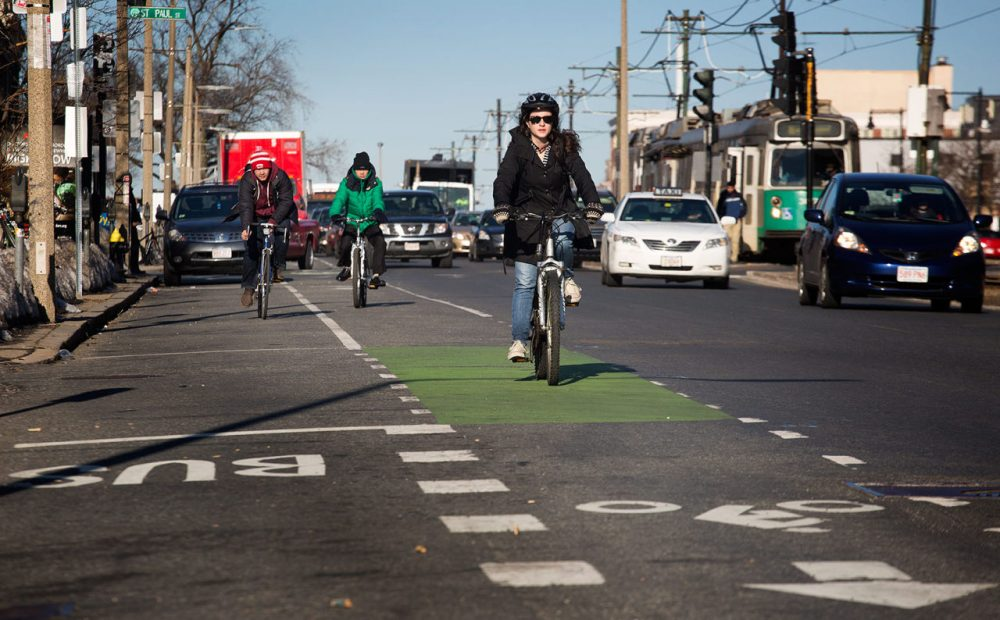

In [156]:
# Don't run this cell in MyBinder, it will throw an error: 

Image("/home/higginss1/FinalProjectSarahHiggins/CommAveNoBuffer.jpg")

In [290]:
bl_df = bike_network.loc[bike_network['ExisFacil'] == 'BL']
no_id = bl_df.drop(['OBJECTID'], axis=1)
no_id
final_bl = no_id.drop_duplicates(['STREET_NAM'])
final_bl_df = final_bl.rename(index=str, columns={"STREET_NAM": "STREET"})
final_bl_df['STREET'] = final_bl_df['STREET'].str.upper() 
# final_bl_df

#### Bike Lane Data Cleaned Up:

Just like with the Buffered Bike Lane data, we're only concerned about the street names:

In [293]:
# Cleaned Bike Lane Data:

clean_bl = final_bl_df[['STREET','ExisFacil']]
clean_bl

,STREET,ExisFacil
2,BLUE HILL AVENUE,BL
4,MORTON STREET,BL
9,TREMONT STREET,BL
13,FORSYTH WAY,BL
14,COMMONWEALTH AVENUE,BL
25,TALBOT AVENUE,BL
27,HUMBOLDT AVENUE,BL
35,FREEPORT STREET,BL
37,DORCHESTER AVENUE,BL
39,D STREET,BL


### *Lane Totals:*

In [294]:
# obtain totals by getting each dataframe shape:

print('Buffered Bike Lane Total: ')
print(final_bfbl_df.shape)
print('Bike Lane Total: ')
print(final_bl_df.shape)

Buffered Bike Lane Total: 
(19, 16)
Bike Lane Total: 
(99, 16)


After obtaining each Dataframe shape, we can see that as of April 2019, Boston, MA has a total of:
* 19 streets with Buffered Bike Lanes, and
* 99 streets with Bike Lanes

### *Number of Cyclist Crashes Per Street:*

All of the Boston Crash Incident reports are stored in the accidents Dataframe.

We will first clean up this database to only consist of the bike mode_type crashes. Then, we will merge the remaining Crash Dataset with each of the Buffered Bike Lane and Bike Lane datasets to compare the crash results.  

In [295]:
accidents

,dispatch_ts,mode_type,location_type,street,xstreet1,xstreet2,x_cord,y_cord,lat,long
0,2/28/2019 16:22,ped,Street,OLD COLONY TER,SAVIN HILL AVE,WILLIAM T MORRISSEY BLVD,778755.72,2939231.02,42.312350,-71.046643
1,2/28/2019 16:17,mv,Intersection,NaN,DAVID G MUGAR WAY,PINCKNEY ST,771761.61,2956054.41,42.358769,-71.072310
2,2/28/2019 15:51,ped,Street,TERMINAL RD,TERMINAL A,TERMINAL B,785398.37,2958235.76,42.365351,-71.021114
3,2/28/2019 15:34,mv,Street,RADCLIFFE RD,GREENFIELD RD,RUSKINDALE RD,763248.44,2923046.31,42.268228,-71.104232
4,2/28/2019 14:44,ped,Intersection,NaN,BOYLSTON ST,MASSACHUSETTS AVE,767612.72,2951853.40,42.347298,-71.087736
5,2/28/2019 12:54,mv,Street,WEST ROXBURY PKWY,NEW PARK AVE,COLBERG AVE,752111.01,2928117.46,42.282235,-71.145630
6,2/28/2019 12:23,mv,Street,WASHINGTON ST,COREY RD,EGREMONT RD,753064.51,2950070.06,42.342854,-71.141305
7,2/28/2019 10:57,ped,Intersection,NaN,E CONCORD ST,HARRISON AVE,771559.29,2947936.65,42.336497,-71.073209
8,2/28/2019 9:10,bike,Street,MAIN ST,WOOD ST,HATHON SQ,773676.65,2962462.43,42.376180,-71.065303
9,2/28/2019 0:51,mv,Other,NaN,NaN,NaN,745397.73,2955465.39,42.357474,-71.169861


### *Clean Crash Data:*

For this project, we are only concerned with the crashes where the mode_type = bike, because this indicates an accident with a cyclist.  We also only want to know the street names involved, the street/ intersection type, and the dispatch time.

Because the Crash Dataset has abbreviated street/avenue/road types, we need to change them to their full title to remain consistent with our lane datasets that contain full titles: 

In [336]:
# add a year column for easy indexing later on:
bike_accidents = accidents.loc[accidents['mode_type'] == 'bike']
clean_ba = bike_accidents[['dispatch_ts','mode_type','location_type','street','xstreet1', 'xstreet2']]
clean_ba['year'] = pd.DatetimeIndex(clean_ba['dispatch_ts']).year

# capitalize street column: 
clean_bike_accidents = clean_ba.rename(index=str, columns={"street": "STREET"})

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [337]:
# so the columns line up appropriately with the data above, we need to replace the
# abbreviated street names to the full street names:

columns = [
    'STREET',
    'xstreet1',
    'xstreet2'
]

name_mapping = {
    r'(\s)ST': r'\1STREET',
    r'(\s)AVE': r'\1AVENUE', 
    r'(\s)RD': r'\1ROAD',
    r'(\s)PL': r'\1PLACE',
    r'(\s)DR': r'\1DRIVE',
    r'(\s)SQ': r'\1SQUARE'
}

for column in columns:
    for key, val in name_mapping.items():
        clean_bike_accidents[column] = clean_bike_accidents[column].str.replace(key, val)

clean_bike_accidents

,dispatch_ts,mode_type,location_type,STREET,xstreet1,xstreet2,year
8,2/28/2019 9:10,bike,Street,MAIN STREET,WOOD STREET,HATHON SQUARE,2019
26,2/25/2019 10:01,bike,Intersection,NaN,WASHINGTON STREET,NEWCOMB STREET,2019
49,2/22/2019 16:11,bike,Intersection,NaN,HUMBOLDT AVENUE,RUTHVEN STREET,2019
57,2/21/2019 15:21,bike,Intersection,NaN,CHARLES STREET,BEACON STREET,2019
92,2/16/2019 15:37,bike,Street,CENTRE STREET,LAMARTINE STREET,WISE STREET,2019
103,2/15/2019 13:19,bike,Intersection,NaN,PARK DRIVE,BROOKLINE AVENUE,2019
107,2/14/2019 17:09,bike,Intersection,NaN,BEECHCROFT STREET,WASHINGTON STREET,2019
116,2/13/2019 19:06,bike,Street,SECOND AVENUE,FIRST AVENUE,SECOND AVENUE,2019
118,2/13/2019 18:14,bike,Street,SUMMER STREET,LINCOLN STREET,HIGH STREET,2019
144,2/11/2019 17:31,bike,Street,BENNINGTON STREET,ANTRIM STREET,ASHLEY STREET,2019


### *Merged Datasets To Determine Bike Lane Efficiency: *

Now that we have concise working datasets specific to this project, we can merge the datasets. 
We are going to merge based on a few conditions, because in *clean_bike_accidents* we are working with three different street columns.  We are going to merge on:
* STREET in *clean_bl* matching STREET in *clean_bike_accidents*
* STREET  in *clean_bl* matching xstreet1 in *clean_bike_accidents*
* STREET in *clean_bl* matching xstreet2 in *clean_bike_accidents*
* STREET in *clean_bfbl* matching STREET in *clean_bike_accidents*
* STREET in *clean_bfbl* matching xstreet1 in *clean_bike_accidents*
* STREET in *clean_bfbl* matching xstreet2 in *clean_bike_accidents*

With all of this information displayed together, we will see how efficient bike lanes are in reducing cycling accidents in and around Boston.

In [338]:
# Street name in clean_bl matching xstreet1 in 

bl_crashes = pd.merge(clean_bl, clean_bike_accidents)
bl_crashes

,STREET,ExisFacil,dispatch_ts,mode_type,location_type,xstreet1,xstreet2,year
0,BLUE HILL AVENUE,BL,12/11/2018 19:11,bike,Street,FAIRBURY STREET,BROOKFORD STREET,2018
1,BLUE HILL AVENUE,BL,11/29/2018 18:14,bike,Street,DONALD ROAD,GREENOCK STREET,2018
2,BLUE HILL AVENUE,BL,2/4/2018 22:56,bike,Street,MORELAND STREET,STAFFORD STREET,2018
3,BLUE HILL AVENUE,BL,9/24/2017 13:26,bike,Street,JULIAN STREET,CLIFFORD STREET,2017
4,BLUE HILL AVENUE,BL,9/9/2017 12:40,bike,Street,GEORGIA STREET,CHENEY STREET,2017
5,BLUE HILL AVENUE,BL,5/18/2017 18:55,bike,Street,RHOADES STREET,MORTON STREET,2017
6,BLUE HILL AVENUE,BL,5/17/2017 4:00,bike,Street,ELLINGTON STREET,COLUMBIA ROAD,2017
7,BLUE HILL AVENUE,BL,12/2/2016 14:04,bike,Street,CLARKWOOD STREET,HOSMER STREET,2016
8,BLUE HILL AVENUE,BL,10/4/2016 18:49,bike,Street,WESTVIEW STREET,HARVARD STREET,2016
9,BLUE HILL AVENUE,BL,12/14/2015 18:26,bike,Street,TENNIS ROAD,ALMONT STREET,2015


In [339]:
bfbl_crashes = pd.merge(clean_bfbl, clean_bike_accidents)
bfbl_crashes

,STREET,ExisFacil,dispatch_ts,mode_type,location_type,xstreet1,xstreet2,year
0,MAIN STREET,BFBL,2/28/2019 9:10,bike,Street,WOOD STREET,HATHON SQUARE,2019
1,MAIN STREET,BFBL,5/18/2018 8:52,bike,Street,ARMORY STREET,BALDWIN STREET,2018
2,MAIN STREET,BFBL,11/1/2017 16:50,bike,Street,BUNKER HILL STREET,CHARLES STREET,2017
3,MAIN STREET,BFBL,7/17/2017 12:41,bike,Street,ALFORD STREET,BEACHAM STREET,2017
4,MAIN STREET,BFBL,1/20/2017 11:10,bike,Street,WALKER STREET,TIBBETTS TOWN WAY,2017
5,MAIN STREET,BFBL,6/24/2016 14:17,bike,Street,SULLIVAN SQUARE,HOLMES PLACE,2016
6,MAIN STREET,BFBL,9/24/2015 7:57,bike,Street,SULLIVAN STREET,FRANKLIN STREET,2015
7,MAIN STREET,BFBL,9/10/2015 8:16,bike,Street,W SCHOOL STREET,LAWNWOOD PLACE,2015
8,COLUMBIA ROAD,BFBL,9/16/2018 16:31,bike,Street,COLUMBIA ROAD ROTARY,BABE RUTH PARK DRIVE,2018
9,COLUMBIA ROAD,BFBL,8/29/2018 17:38,bike,Street,E COTTAGE STREET,ELDER STREET,2018


## Visualization:

After all data munging we've done up until now, we have clean and concise datasets we can work with that contains:
* All Boston streets with bike lanes where accidents have occured up until 2019, and
* All Boston streets with buffered bike lanes where accidents have occured up until 2019

We will plot the data for roads only having Bike Lanes and Buffered Bike Lanes as two separate lines on the same visual:  

([<matplotlib.axis.YTick at 0x7f47b5c83898>,
 <a list of 6 Text yticklabel objects>)

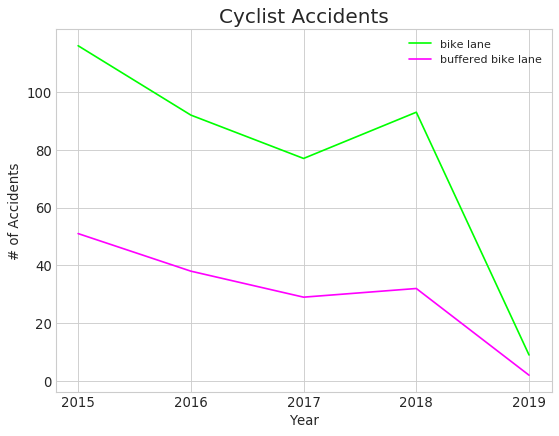

In [417]:
# Bike Lane Data:
bike_lane = bl_crashes['year'].groupby(bl_crashes['year'], sort=True).count()

# # Buffered Bike Lane Data:
buffered_lane = bfbl_crashes['year'].groupby(bfbl_crashes['year'], sort=True).count()
buffered_lane

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(bike_lane, color='lime', label='bike lane')
plt.plot(buffered_lane, color='magenta', label='buffered bike lane')
plt.legend()
plt.title('Cyclist Accidents', fontsize=18)
plt.ylabel('# of Accidents', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(range(2015, 2020, 1), fontsize=12)
plt.yticks(range(0, 120, 20), fontsize=12)

### *Bar Graph*

We can also plot the bike_lane and buffered_lane data as a Bar graph.  To do so, we'll convert the dataframes to dictionaries to be better read for the bar graph creation:

In [369]:
bike_lane

year
2015    116
2016     92
2017     77
2018     93
2019      9
Name: year, dtype: int64

In [370]:
buffered_lane

year
2015    51
2016    38
2017    29
2018    32
2019     2
Name: year, dtype: int64

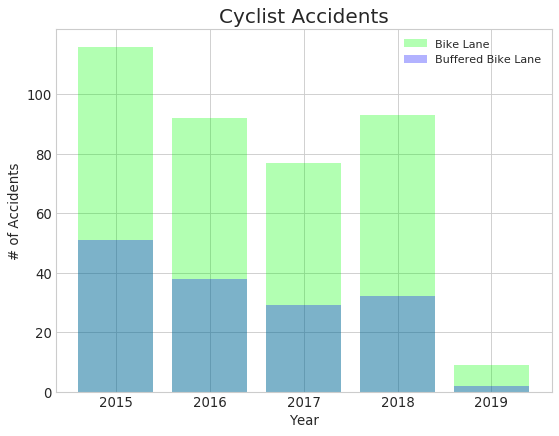

In [413]:
bl_dict = {
    2015: 116,
    2016: 92,
    2017: 77,
    2018: 93,
    2019: 9
}

bfbl_dict = {
    2015: 51,
    2016: 38,
    2017: 29,
    2018: 32,
    2019: 2
}

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(bl_dict.keys(), bl_dict.values(), color='lime', alpha = 0.3)
plt.bar(bfbl_dict.keys(), bfbl_dict.values(), color='blue', alpha = 0.3)
plt.title('Cyclist Accidents', fontsize=18)
plt.legend(['Bike Lane', 'Buffered Bike Lane'])
plt.ylabel('# of Accidents', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(range(2015, 2020, 1), fontsize=12)
plt.yticks(range(0, 120, 20), fontsize=12)
plt.show()

### *Step Plot*

We can also make a Step plot with Matplotlib, using arrays of the above information:

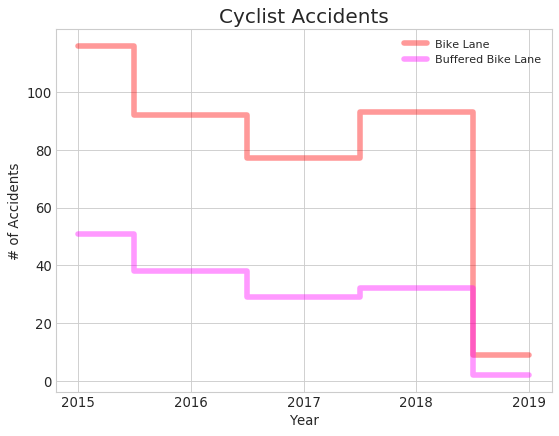

In [414]:
years = [2015, 2016, 2017, 2018, 2019]
bl_accidents = [116, 92, 77, 93, 9]
bfbl_accidents = [51, 38, 29, 32, 2]

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.step(years, bl_accidents, where='mid', linewidth=5, color='red', alpha = 0.4)
plt.step(years, bfbl_accidents, where='mid', linewidth=5, color='magenta', alpha = 0.4)
plt.title('Cyclist Accidents', fontsize=18)
plt.legend(['Bike Lane', 'Buffered Bike Lane'])
plt.ylabel('# of Accidents', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(range(2015, 2020, 1), fontsize=12)
plt.yticks(range(0, 120, 20), fontsize=12)
plt.show()

## Survey of Methods and Tools

**%matplotlib inline** 

Matplotlib allowed us to create the visuals to see just how much more effective Buffered Bike Lanes are rather than Bike Lanes on streets. 

**import matplotlib.pyplot as plt**

From the pyplot library, we were able to create the 2D visual above to better see how much more effective Buffered Bike Lanes are than Bike Lanes.  The original graph shown was smaller, but changing its size and font sizes was simple enough to create a much better, cleaner looking image.  

**from matplotlib.pyplot import figure**

This library also allowed us to customize the 2d visual represented above.  

Matplotlib is an amazing tool that makes data visualizing easy, simple, and approachable.  

**plt.style.use('seaborn-whitegrid)**

Typically, Matplotlib on its own gives back a grey graph rather than a clean white one as a visual.  Seaborn allows us to see better, cleaner graphs.  

**import numpy as np**

Numpy helped us in this project to better represent the data from the datasets by accessing specific information 

**import pandas as pd**

Pandas was the hero of this project.  With Pandas we were able to manipulate and munge through all of the datasets that were required to be a part of coming to the conclusion of this project.  Pandas is an incredible tool which makes analyzing data much easier and concise.  Rather than working with large amounts of unnecessary data that come with datasets that we're interested in for projects like this one, Pandas allows us to be concise and quick with our data manipulation and renaming of columns and indices.

**import re, datetime**

By using regex, we were able to simply index all of the keys and values found within the name_mapping dictionary created to rename streets like ST to STREET and AVE to AVENUE.  This was done in a simple for loop style and we mapped the value to all of the columns within the columns array that were being manipulated within the Crash dataset.  


### Most Frequently Taken Streets

Let's compare the Buffered Bike Lane dataset now to see if any of those streets are within the Most Frequently Cycled dataset.  If the street is not in the Most Frequently Cycled dataset, then that means that street would more than likely benefit from having a buffered bike lane added to it, based on the statistics above: 

In [461]:
# Most taken cycled streets with buffered bike lanes:
most_cycled_bfbl = pd.merge(clean_bfbl, most_cycled, on=['STREET'], how='inner')
most_cycled_bfbl

,STREET,ExisFacil,PERCENTAGE
0,A STREET,BFBL,10.9
1,COMMONWEALTH AVENUE,BFBL,15.3


In [462]:
# Most taken cycled streets with bike lanes only: 
most_cycled_bl = pd.merge(clean_bl, most_cycled, on=['STREET'], how='inner')
most_cycled_bl

,STREET,ExisFacil,PERCENTAGE
0,COMMONWEALTH AVENUE,BL,15.3
1,MASSACHUSETTS AVENUE,BL,18.5
2,FRANKLIN STREET,BL,43.0
3,COLUMBUS AVENUE,BL,20.9
4,A STREET,BL,10.9
5,NORTH HARVARD STREET,BL,15.5
6,WASHINGTON STREET,BL,19.5
7,LONGFELLOW BRIDGE,BL,20.2
8,WESTERN AVENUE,BL,11.4
9,LONGWOOD AVENUE,BL,23.1


## Summary

Boston's addition of Buffered Bike Lanes are becoming life saving lanes for cyclists.  Cycling is on the rise in major cities, especially in Boston with Cambridge and Somerville being right next to Boston and being cyclist hubs in their own way.  We can see that adding buffered bike lanes reduces the number of accidents involving cyclists and motorists, which keeps everyone safer.

Based on the statistics, only 2 of the most frequently cycled roads feature buffered bike lanes right now.  That number must go up, especially since there are a total of 10 streets in the database.  9 of those streets - including one that has a Buffered Bike Lane on part of it, that one being Commonwealth Avenue - have bike lanes, at least.  

Buffered Bike Lanes have padded edges that can demand more space on Boston's compact and skinny roads, however.  With the number of cyclists on the rise in the city of Boston, perhaps the city can sacrafice some parking spaces on streets to allow more room for more buffered bike lanes to be added, providing safer roads for everyone.  Cars contriubte to global warming, and cycling does not.  In fact, it's a much healther way to commute for both the body and mind, as it is good exercise.  The chances of getting stuck in a traffic jam on a bike are much smaller, too.  

Perhaps we should all bike around Boston and contribute to this project's proposal to add more Buffered Bike Lanes to the city, creating a safer and greener city for everybody to appreciate.  